Training Random Forest...
Random Forest training completed.
Training SVM...
SVM training completed.
Training Gradient Boosting...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting training completed.
Training Neural Network...
Neural Network training completed.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


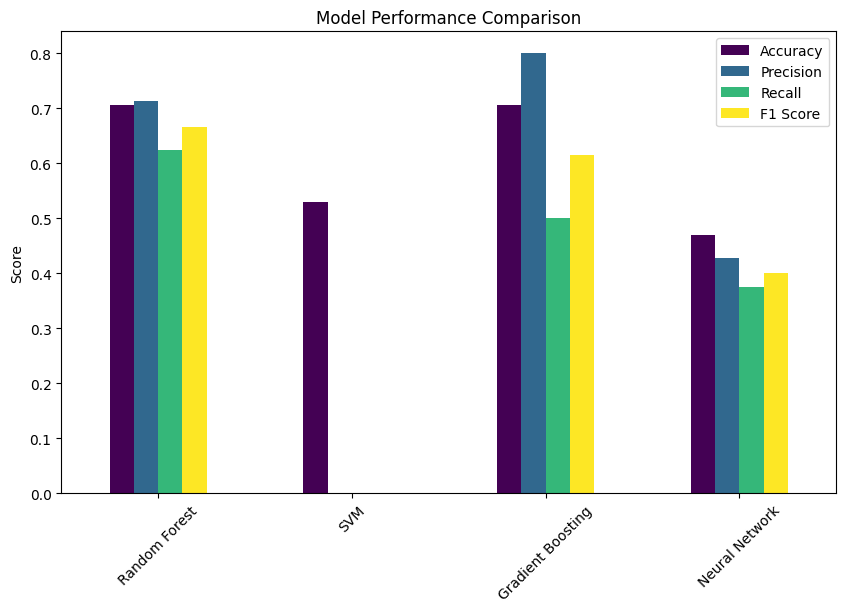

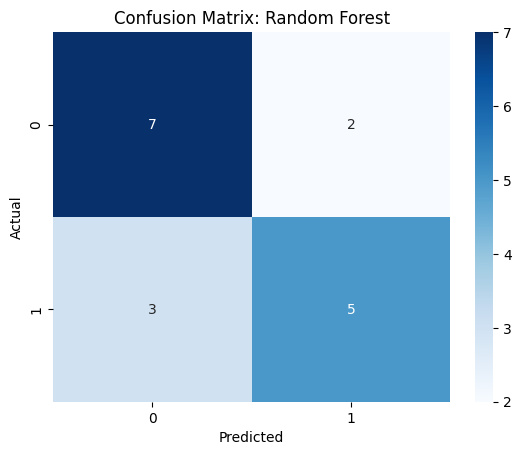

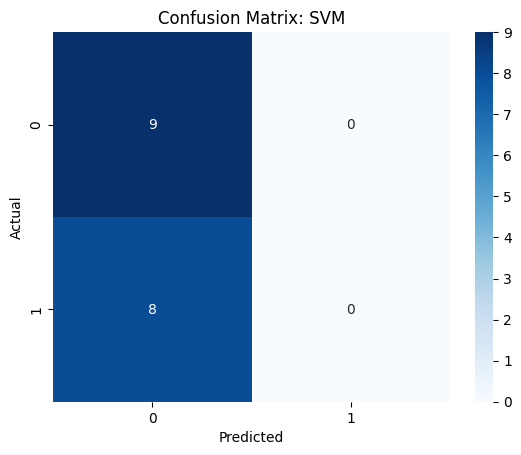

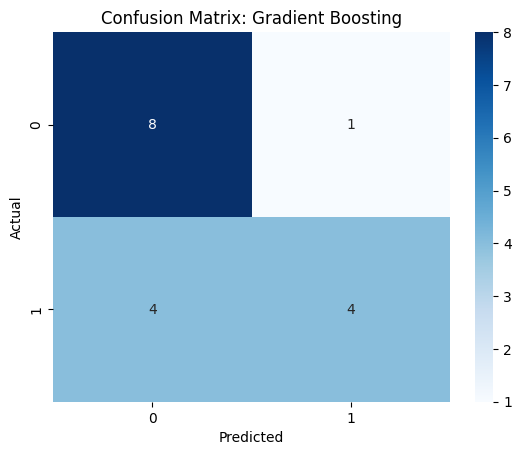

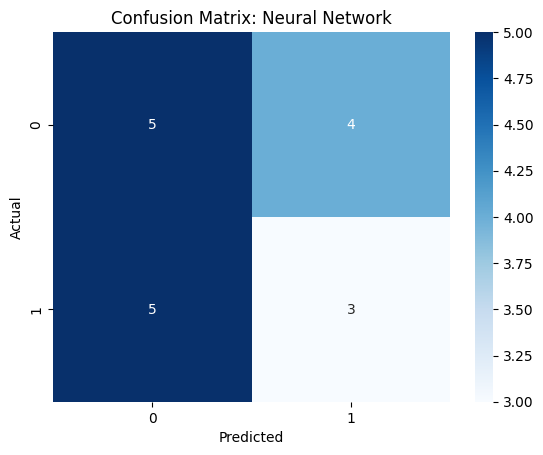

                   Accuracy Precision Recall  F1 Score  Confusion Matrix
Random Forest      0.705882  0.714286  0.625  0.666667  [[7, 2], [3, 5]]
SVM                0.529412       0.0    0.0       0.0  [[9, 0], [8, 0]]
Gradient Boosting  0.705882       0.8    0.5  0.615385  [[8, 1], [4, 4]]
Neural Network     0.470588  0.428571  0.375       0.4  [[5, 4], [5, 3]]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

# Load dataset
def load_data(file_path):
    return pd.read_excel(file_path, engine="openpyxl")

# Preprocess data
def preprocess_data(df):
    X = df.iloc[:, :-1]
    y = df['target']  # Target column
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Training and evaluating models
def train_models(X_train, X_test, y_train, y_test):
    models = {
        "Random Forest": RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42),
        "SVM": SVC(kernel='rbf', probability=True, max_iter=1000),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50),
        "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, random_state=42)
    }

    results = {}
    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        print(f"{name} training completed.")
        y_pred = model.predict(X_test)
        results[name] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred),
            "Confusion Matrix": confusion_matrix(y_test, y_pred)
        }

        joblib.dump(model, f"{name.replace(' ', '_')}.pkl")
    return results

# Visualization
def visualize_results(results):
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
    df_results = pd.DataFrame(results).T[metrics]
    df_results.plot(kind='bar', figsize=(10,6), colormap='viridis')
    plt.title("Model Performance Comparison")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.show()

    for name, res in results.items():
        sns.heatmap(res['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix: {name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

if __name__ == "__main__":
    file_path = "OilSpill_ExtractedFeatures.xlsx"
    df = load_data(file_path)
    X_train, X_test, y_train, y_test = preprocess_data(df)
    results = train_models(X_train, X_test, y_train, y_test)
    visualize_results(results)
    print(pd.DataFrame(results).T)

From above, we see Random Forest and Gradient Boosting seem to give the best results but seeing the precision, accuracy and recall, it seems to be that Random Forest will provide more reliable outputs. Hence, we choose ***Random Forest*** as our base Model.

In [ ]:
import joblib
import numpy as np

def load_model(model_path):
    model = joblib.load(model_path)
    return model

def load_scaler(scaler_path):
    scaler = joblib.load(scaler_path)
    return scaler

def predict_oil_spill(model, scaler, features):
    features_array = np.array(features).reshape(1, -1)
    features_scaled = scaler.transform(features_array)
    prediction = model.predict(features_scaled)

    if prediction == 1:
        return "Oil Spill Detected"
    else:
        return "No Oil Spill"

if __name__ == "__main__":
    model = load_model('Random_Forest.pkl')
    scaler = load_scaler('scaler.pkl')

    features_input = [92.51117460317461, 95.0, 24.66360023831771, 1, 234, 233, 92.51117460317461, 92.51117460317461,
                      92.51117460317461, 24.66360023831771, 24.66360023831771, 24.66360023831771, 208.3769255353171,
                      292.7161848218773, 234.925769230762, 304.67894940628594, 269.0508365508471, 292.7161848218773,
                      360.0519093851049, 304.67894940628594, 10.734356024288871, 12.635906040267844, 10.977435897435658,
                      12.784912235415078, 12.088030888031271, 12.635906040267844, 13.513268608413801, 12.784912235415078,
                      0.11004952754788518, 0.08602375976468574, 0.1054923121823769, 0.0859911441284447, 0.08941911624212155,
                      0.08602375976468574, 0.07929659509806358, 0.0859911441284447, 0.018751355731301295, 0.01766973110534179,
                      0.018929694486001045, 0.01766778660201874, 0.017962142171886106, 0.01766973110534179, 0.017534003280432187,
                      0.01766778660201874, 0.8286711660741487, 0.760270769764062, 0.8076552867145451, 0.7504820966496022,
                      0.7787291196741365, 0.760270769764062, 0.7064334474076558, 0.7504820966496022, 0.00035161334176180594,
                      0.00031221939733508316, 0.0003583333333333383, 0.00031215068341447293, 0.00032263855140304934,
                      0.00031221939733508316, 0.00030744127103820673, 0.00031215068341447293, 6.3492065e-05, 0.0,
                      0.0005079365, 0.00057142857, 0.0019047619, 0.0028571428, 0.0046984125, 0.011809524, 0.011619047,
                      0.015301587, 0.0062857145, 0.0032380952, 0.0027936508, 0.002095238, 0.002095238, 0.00215873,
                      0.004063492, 0.0063492064, 0.010476191, 0.024888888, 0.030666666, 0.053015873, 0.047746032,
                      0.048825398, 0.064444445, 0.044825397, 0.06355555, 0.048126984, 0.049079366, 0.06819048,
                      0.050666668, 0.062984124, 0.047238097, 0.05669841, 0.036380954, 0.028825397, 0.031301588,
                      0.016507937, 0.014920635, 0.008, 0.004952381, 0.003873016, 0.0017142857, 0.0014603174, 0.0006349206,
                      0.00044444445, 0.00019047619, 0.00012698413, 0.00012698413, 0.0, 6.3492065e-05, 6.3492065e-05,
                      0.00012698413, 6.3492065e-05, 6.3492065e-05, 0.0, 0.0, 0.0, 6.3492065e-05, 0.0, 6.3492065e-05,
                      0.0, 0.0, 0.0, 0.00012698413, 0.0, 0.0, 0.0, 6.3492065e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                      54, 3.3425925925925926, 163.58073437213898, 26.5, 17.76799774169922, 93.65223693847656,
                      56.246761322021484, 0, 0, 0, 0, 0, 0, 0, 0]

    result = predict_oil_spill(model, scaler, features_input)
    print(result)

Oil Spill Detected


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
import numpy as np

def load_model(model_path):
    model = joblib.load(model_path)
    return model

def predict_oil_spill(model, features):
    features_array = np.array(features).reshape(1, -1)

    prediction = model.predict(features_array)

    if prediction == 1:
        return "Oil Spill Detected"
    else:
        return "No Oil Spill"

if __name__ == "__main__":
    model = load_model('/content/Random_Forest.pkl')

    features_input = [119.97666354300584,103.0,51.80000883240372,0,255,255,
                      119.97600912315485,120.01024031536066,119.91075881724261,
                      51.801509030356144,51.77002834075602,51.86337226956371,514.0781192430986,
                      931.9009539006038,626.1976062529399,959.4105870768431,977.9366672878498,
                      931.9009539006038,1116.9028959629427,959.4105870768431,10.309608948080875,
                      17.20345485716081,12.475376276547152,17.370143852060146,17.330950272288632,
                      17.20345485716081,20.480232919259077,17.370143852060146,0.3795478473641172,
                      0.18414642932332062,0.3677985249862081,0.18332023456189134,0.11857991652868632,
                      0.18414642932332062,0.10839170685740279,0.18332023456189134,0.059373496927987955,
                      0.05076256814141292,0.058429233270435026,0.05058402692385875,0.050328041718960985,
                      0.05076256814141292,0.05047583628721358,0.05058402692385875,0.9037703449649678,
                      0.8242764995450254,0.8824616695079498,0.8190891574592252,0.8161021426081739,
                      0.8242764995450254,0.7895805568770775,0.8190891574592252,0.003525212137457795,
                      0.0025768383243115894,0.0034139753005709116,0.0025587437798336673,0.0025329117832654773,
                      0.0025768383243115894,0.0025478100488935877,0.0025587437798336673,0.0049217017,
                      0.0,0.0,0.0,0.0,7.744614e-06,0.0,3.872307e-06,5.80846e-06,2.323384e-05,5.614845e-05,
                      0.00010455228,0.00041046453,0.0007183129,0.0020039189,0.0031326963,0.007887889,0.010093167,
                      0.014980019,0.029894209,0.029479872,0.046597403,0.038558494,0.04189255,0.055317838,0.041836403,
                      0.05229744,0.036484875,0.034746207,0.04232625,0.028070353,0.035088908,0.023311287,0.02888741,
                      0.019437045,0.01773323,0.022039235,0.01534208,0.018358607,0.01295093,0.012259724,0.015469866,
                      0.011068989,0.014002262,0.010950884,0.01355501,0.009806617,0.009992488,0.012983845,0.0095433,
                      0.0119654285,0.008478416,0.008137653,0.010451356,0.00759553,0.009006985,0.006131798,0.0056245257,
                      0.007030173,0.004708725,0.0052953796,0.0034328,0.0037716269,0.0026447854,0.0026312324,0.002613807,
                      0.0016999427,0.0021762364,0.0013514351,0.0012023513,0.0014037113,0.0007976952,0.0008906306,0.0004782299,
                      0.055846408,5830,16.969811320754715,4833.552839517593,7347.5,152.8417205810547,205.8267059326172,
                      70.35367584228516,0,0,0,0,0,0,0,0]

    result = predict_oil_spill(model, features_input)
    print(result)

No Oil Spill


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Example of an oil spill that is automatically delineated from satellite synthetic aperture radar © European Space Agency – ESA </br>
After feature extraction - feature values are found

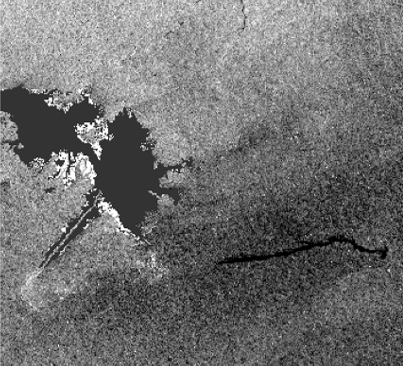

In [ ]:
#Model Test 12

import joblib
import numpy as np

def load_model(model_path):
    model = joblib.load(model_path)
    return model

def predict_oil_spill(model, features):
    features_array = np.array(features).reshape(1, -1)

    prediction = model.predict(features_array)

    if prediction == 1:
        return "Oil Spill Detected"
    else:
        return "No Oil Spill"

if __name__ == "__main__":
    # Load the trained Random Forest model
    model = load_model('/content/Random_Forest.pkl')
    features_input = [111.71787414066631,109.0,46.902280277362976,0,255,255,111.71787414066631,111.71787414066631,111.71787414066631,46.902280277362976,46.902280277362976,46.902280277362976,714.2592637904835,950.525284536013,630.9430368131282,956.1343556189688,1208.3644917763481,950.525284536013,1177.604436506209,956.1343556189688,19.371312834737164,22.577352961216263,18.292586423745217,22.611367818438065,25.516952155137517,22.577352961216263,25.231287323094357,22.611367818438065,0.09389976782679142,0.08533327317732134,0.0959156990100402,0.08543780560636587,0.07937621257394613,0.08533327317732134,0.0803547463304764,0.08543780560636587,0.03861210908943755,0.03805496076510244,0.038995283624601425,0.038007557019118725,0.03755226479141669,0.03805496076510244,0.037888110090500936,0.038007557019118725,0.8376192847485677,0.7837847796725582,0.8565101774582156,0.7825049753485792,0.725367420447708,0.7837847796725582,0.7320308918260746,0.7825049753485792,0.0014908949683346262,0.001448180038833486,0.0015206321449631078,0.0014445743905615609,0.0014101725909646736,0.001448180038833486,0.0014355088862299187,0.0014445743905615609,0.0030780078,0.0009356059,0.0013288315,0.001152558,0.0017966345,0.0014915457,0.0020542652,0.0034237753,0.0032746207,0.0058916053,0.00521363,0.0064272056,0.010345903,0.012318811,0.064326294,0.018976528,0.018773137,0.01397985,0.015112069,0.022088435,0.017796852,0.02497661,0.020264681,0.020440955,0.02795292,0.021925721,0.02936989,0.02280709,0.022963023,0.029424127,0.022285048,0.029803794,0.021640971,0.028210552,0.020617228,0.01976298,0.026237644,0.019240938,0.025864758,0.019098563,0.018813815,0.024963051,0.01893585,0.024366433,0.01810872,0.023559641,0.016820567,0.016712092,0.020454515,0.015017153,0.018169738,0.012291692,0.012257793,0.0137222195,0.009084869,0.010630652,0.006752634,0.0058034686,0.0064678844,0.0037085249,0.0043865,0.0026169845,0.0025898656,0.0015796825,0.0013491708,0.001261034,0.0007593323,0.00096950465,0.00055593974,0.00037288642,0.0006915348,0.0004610232,0.0005152612,0.00079323107,0.001783075,3410,9.402346041055718,3018.044049859047,1403.5,77.11429595947266,139.73934936523438,51.61471939086914,0,0,0,0,0,0,0,0]

    result = predict_oil_spill(model, features_input)
    print(result)

Oil Spill Detected


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Now we test with several lookalikes!! </br>
Oil on the water surface dampens capillary waves and appears dark in SAR imagery, but there are other natural features that are also dark in the data. Effective oil spill monitoring requires the ability to separate true spills from look-alikes © European Space Agency – ESA

Test 1 : Internal Waves 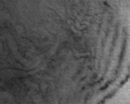

In [ ]:
import joblib
import numpy as np

def load_model(model_path):
    model = joblib.load(model_path)
    return model

def predict_oil_spill(model, features):
    features_array = np.array(features).reshape(1, -1)

    prediction = model.predict(features_array)

    if prediction == 1:
        return "Oil Spill Detected"
    else:
        return "No Oil Spill"

if __name__ == "__main__":
    model = load_model('/content/Random_Forest.pkl')
    features_input = [85.76412721893492,82.0,23.496740302849563,33,176,143,85.76412721893492,85.76412721893492,85.76412721893492,23.496740302849563,23.496740302849563,23.496740302849563,33.09153249850819,63.33318281026766,28.578566094099987,46.88078573041442,103.16083233172462,63.33318281026766,80.95399698341078,46.88078573041442,4.103756708407743,5.476029201475178,3.8168035847647346,5.1265898999021875,7.194035456730404,5.476029201475178,6.345248868778597,5.1265898999021875,0.24315492757235552,0.1991772704592886,0.25589244936244004,0.19197702823094534,0.1524219346433524,0.1991772704592886,0.1677368548737617,0.19197702823094534,0.03150056080370768,0.028096200106855918,0.031760701483836945,0.02750765304434966,0.024813553829058557,0.028096200106855918,0.025378278497358353,0.02750765304434966,0.9693130819298594,0.9411780038835964,0.9740803243747347,0.9564508718848996,0.9022266759680005,0.9411780038835964,0.926453896808156,0.9564508718848996,0.0009922853309480846,0.0007893964604444905,0.0010087421587454022,0.0007566709760083191,0.0006157124536275865,0.0007893964604444905,0.0006440570194894813,0.0007566709760083191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000147929,0.000147929,0.0011094675,0.0039201183,0.007026627,0.017233727,0.017381657,0.039718933,0.03306213,0.040532544,0.06664201,0.056878697,0.077884614,0.058136094,0.06849112,0.09393491,0.060946744,0.06420118,0.042233728,0.02714497,0.030251479,0.020931954,0.023446746,0.016420119,0.01989645,0.012056213,0.011390532,0.015162722,0.009615385,0.012795858,0.008431952,0.0065088756,0.0068786982,0.0055473372,0.005769231,0.0032544378,0.0039201183,0.002810651,0.00295858,0.0031065089,0.0014053255,0.000591716,7.39645e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,18.136363636363637,53.94112491607666,66.0,5.70044469833374,21.252025604248047,53.82303237915039,0,0,0,0,0,0,0,0]
    result = predict_oil_spill(model, features_input)
    print(result)

No Oil Spill


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Test 2: Wind Shadowing 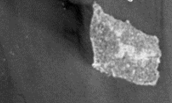

In [ ]:
import joblib
import numpy as np

def load_model(model_path):
    model = joblib.load(model_path)
    return model

def load_scaler(scaler_path):
    scaler = joblib.load(scaler_path)
    return scaler

def predict_oil_spill(model, scaler, features):
    features_array = np.array(features).reshape(1, -1)

    features_scaled = scaler.transform(features_array)

    prediction = model.predict(features_scaled)

    if prediction == 1:
        return "Oil Spill Detected"
    else:
        return "No Oil Spill"

if __name__ == "__main__":
    model = load_model('Random_Forest.pkl')
    scaler = load_scaler('scaler.pkl')

    features_input = [92.0931361481147, 81.0, 42.225175823447366, 0, 240, 240, 92.0931361481147, 92.0931361481147,
                      92.0931361481147, 42.225175823447366, 42.225175823447366, 42.225175823447366, 105.435587350262,
                      148.95745900701243, 84.77336981304812, 177.51353055844788, 274.76641918904863, 148.95745900701243,
                      224.02809118125305, 177.51353055844788, 6.067847612559468, 7.131865611742656, 5.441632466940698,
                      7.734950120400087, 9.032324386065667, 7.131865611742656, 8.434492286439541, 7.734950120400087,
                      0.21452504067289524, 0.19275981399365466, 0.24024112653443155, 0.18200606081028706, 0.17332961132998867,
                      0.19275981399365466, 0.17976141080602803, 0.18200606081028706, 0.02856059569305123, 0.02689648246930661,
                      0.03028634176888002, 0.02617985048813515, 0.025490583492358068, 0.02689648246930661, 0.02592437202263336,
                      0.02617985048813515, 0.97056072096929, 0.9586155295299056, 0.9763450531128504, 0.9506821425809275,
                      0.9236230965174819, 0.9586155295299056, 0.9378442453828428, 0.9506821425809275, 0.0008157076263419365,
                      0.0007234207692217178, 0.0009172624977414066, 0.0006853845715811103, 0.0006497698467808776, 0.0007234207692217178,
                      0.0006720730647678954, 0.0006853845715811103, 0.0010160307, 0.0017498307, 0.0022013998, 0.0020885076,
                      0.0037254458, 0.0028787537, 0.0028787537, 0.004741477, 0.0051365998, 0.011458568, 0.009370061,
                      0.007112215, 0.011063445, 0.009200723, 0.020433506, 0.022183336, 0.033021, 0.026811922, 0.025231428,
                      0.06067961, 0.06271167, 0.07637164, 0.05187401, 0.047753442, 0.08850756, 0.055768795, 0.04837435,
                      0.030424476, 0.021505984, 0.02314292, 0.007846015, 0.0037818921, 0.0017498307, 0.0025400768, 0.0023707384,
                      0.0025400768, 0.005023707, 0.004967261, 0.0077331224, 0.0073379995, 0.008466923, 0.012643938, 0.009539399,
                      0.014450215, 0.011345676, 0.016030706, 0.009878077, 0.01055543, 0.010386092, 0.009200723, 0.010442538,
                      0.007168661, 0.006660646, 0.0069993227, 0.004459246, 0.0051365998, 0.0028223074, 0.0039512306, 0.0040076766,
                      0.0028223074, 0.0041770153, 0.0027094153, 0.0025400768, 0.0017498307, 0.0019191691, 0.0020320613,
                      0.00095958455, 0.0010160307, 0.0003386769, 0.0002257846, 5.644615e-05, 0.0, 0.0, 0.0, 0.0, 45,
                      168.04444444444445, 375.8477590084076, 3684.0, 54.94377517700195, 94.75090789794922, 132.11793518066406,
                      0, 0, 0, 0, 0, 0, 0, 0]

    result = predict_oil_spill(model, scaler, features_input)
    print(result)


No Oil Spill


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Test 3: Upwelling 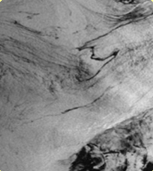

In [ ]:
import joblib
import numpy as np

def load_model(model_path):
    model = joblib.load(model_path)
    return model

def load_scaler(scaler_path):
    scaler = joblib.load(scaler_path)
    return scaler

def predict_oil_spill(model, scaler, features):
    features_array = np.array(features).reshape(1, -1)

    features_scaled = scaler.transform(features_array)

    prediction = model.predict(features_scaled)

    if prediction == 1:
        return "Oil Spill Detected"
    else:
        return "No Oil Spill"

if __name__ == "__main__":
    model = load_model('Random_Forest.pkl')
    scaler = load_scaler('scaler.pkl')

    features_input = [136.19737797653175,139.0,34.565190415973355,1,246,245,136.17815235255895,136.20016817643236,
                      136.19795130527845,34.5588204063408,34.567394177950334,34.568633167136774,125.86341951368964,
                      291.6549535603533,183.73729334870325,223.38599071206363,343.6856047403349,291.6549535603533,
                      450.9433422284394,223.38599071206363,7.264389042782037,10.524613003095343,8.553364090733844,
                      9.72561919504593,11.796367297935955,10.524613003095343,13.432184708203664,9.72561919504593,
                      0.16874003242768346,0.13277600425445693,0.15654936521995838,0.1312155567944691,0.11215709613519395,
                      0.13277600425445693,0.10615547274276321,0.1312155567944691,0.01998835388341539,0.01751961527844107,
                      0.01896962472884929,0.01756181546373885,0.016373360315978715,0.01751961527844107,0.015639417841750467,
                      0.01756181546373885,0.9471750113115738,0.8767638742657007,0.922580037741233,0.9056129811008787,
                      0.8554653122218249,0.8767638742657007,0.8087942998318188,0.9056129811008787,0.00039953429096864707,
                      0.00030693691950458587,0.00035984666235337054,0.00030841736238241705,0.0002680869280368666,0.00030693691950458587,
                      0.0002445913904288628,0.00030841736238241705,3.8221915e-05,7.644383e-05,0.0008408822,0.0018728739,0.0042044106,
                      0.0033253068,0.002255093,0.002331537,0.0010702136,0.002331537,0.0016435424,0.0014524328,0.0019110958,0.0020639836,
                      0.0025226464,0.0022168711,0.0029813095,0.0024462026,0.0030577532,0.0037075258,0.0038986355,0.0057332874,0.004471964,
                      0.0057332874,0.00798838,0.0070710545,0.011084355,0.009746589,0.012383901,0.019990062,0.016588312,0.027252227,
                      0.025188243,0.04032412,0.034590833,0.034973055,0.044146314,0.030768642,0.042579215,0.037572145,0.039062798,
                      0.05263158,0.035813935,0.047165845,0.036463708,0.045980964,0.03982724,0.03608149,0.04227344,0.024614913,
                      0.026870007,0.018919848,0.015441654,0.017620303,0.0116959065,0.011887016,0.0069563887,0.0054657343,0.005886175,
                      0.0038221916,0.004854183,0.0028666437,0.002331537,0.0005351068,0.0002293315,0.00019110958,0.0,0.0,0.0,0.0,0.0,
                      3.8221915e-05,3.8221915e-05,0.0,0.0,132,11.719696969696969,873.5605236291885,260.5,23.726360321044922,
                      93.72433471679688,59.30903625488281,0,0,0,0,0,0,0,0]  # Input with 150 features

    # Prediction via Model
    result = predict_oil_spill(model, scaler, features_input)
    print(result)


No Oil Spill


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Test 4 :  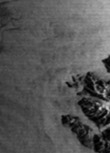

In [ ]:
import joblib
import numpy as np

def load_model(model_path):
    model = joblib.load(model_path)
    return model

def load_scaler(scaler_path):
    scaler = joblib.load(scaler_path)
    return scaler

def predict_oil_spill(model, scaler, features):
    features_array = np.array(features).reshape(1, -1)

    features_scaled = scaler.transform(features_array)

    prediction = model.predict(features_scaled)

    if prediction == 1:
        return "Oil Spill Detected"
    else:
        return "No Oil Spill"

if __name__ == "__main__":
    model = load_model('Random_Forest.pkl')
    scaler = load_scaler('scaler.pkl')
    features_input = [85.03511586452763,83.0,31.310607534484134,0,206,206,85.03547237076648,85.03511586452763,85.03511586452763,31.310508452784262,31.310607534484134,31.310607534484134,76.79276848353683,126.90632544663836,80.80544258373396,148.36160067599636,224.58732752361064,126.90632544663836,229.85647200481446,148.36160067599636,4.970618216705339,6.557701593432901,5.345633971291978,7.122344278126278,8.451282982329102,6.557701593432901,8.793016255268196,7.122344278126278,0.2515427251320342,0.19465919306412657,0.22539817780312915,0.17777339258659214,0.16559412025800496,0.19465919306412657,0.15328750173583316,0.17777339258659214,0.028732549295398715,0.025171605699765065,0.02730035508833116,0.02413836116910284,0.02294559449387782,0.025171605699765065,0.02217323504804304,0.02413836116910284,0.9603243286787841,0.9343910938508797,0.9587633262869386,0.9233049548275916,0.8822770487015177,0.9343910938508797,0.8825269401079985,0.9233049548275916,0.0008255593890125173,0.000633609733504445,0.000745309387948969,0.0005826604799300518,0.0005265003066774761,0.000633609733504445,0.0004916523524957643,0.0005826604799300518,0.0045157457,0.0039809863,0.0076054665,0.007308378,0.008793821,0.0064171124,0.0063576945,0.009150327,0.0060011884,0.0074272132,0.006654783,0.0065953652,0.010160428,0.007961973,0.010754605,0.011883541,0.017231135,0.016161617,0.0238265,0.053475935,0.047177657,0.07237077,0.060427807,0.06446821,0.073737375,0.0456328,0.054426618,0.039988115,0.036304217,0.039275102,0.025609031,0.025787285,0.015686275,0.018835412,0.015092097,0.01503268,0.017706476,0.012240048,0.013666073,0.007486631,0.007308378,0.009209745,0.0065953652,0.008972074,0.0075460486,0.009566251,0.0052287583,0.0045751636,0.003267974,0.0019013666,0.0013666073,0.00047534166,0.00047534166,0.000118835414,0.0,0.0,0.0,5.9417707e-05,0.0,0.0,0.000118835414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35,21.15714285714286,297.70562410354614,244.0,26.858516693115234,30.464548110961914,108.01732635498047,0,0,0,0,0,0,0,0]  # Input with 150 features

    result = predict_oil_spill(model, scaler, features_input)
    print(result)

No Oil Spill


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
import numpy as np

def load_model(model_path):
    model = joblib.load(model_path)
    return model

def load_scaler(scaler_path):
    scaler = joblib.load(scaler_path)
    return scaler

def predict_oil_spill(model, scaler, features):
    features_array = np.array(features).reshape(1, -1)

    features_scaled = scaler.transform(features_array)

    prediction = model.predict(features_scaled)

    if prediction == 1:
        return "Oil Spill Detected"
    else:
        return "No Oil Spill"

if __name__ == "__main__":
    model = load_model('Random_Forest.pkl')
    scaler = load_scaler('scaler.pkl')
    features_input = [37.225236306729265,34.0,20.092885583677234,0,255,255,37.225236306729265,37.225236306729265,37.225236306729265,20.092885583677234,20.092885583677234,20.092885583677234,773.9136516202802,771.912345566592,778.9195298542903,767.3843488586543,771.8752986669343,771.912345566592,771.3940238542565,767.3843488586543,21.52001944854225,21.432024150205564,21.609973358408727,21.38255832582229,21.4464883048268,21.432024150205564,21.418738229752496,21.38255832582229,0.04803484801824444,0.04878101193998487,0.04779255958909079,0.04836342679505796,0.04853933523932111,0.04878101193998487,0.04810198576377067,0.04836342679505796,0.015585326661174494,0.015579292323816192,0.015586447644517417,0.015581692664444662,0.015569606030830503,0.015579292323816192,0.015579741278860913,0.015581692664444662,0.041066866726197436,0.04347089674044306,0.03525766918900986,0.049092269537729695,0.043099652419391926,0.04347089674044306,0.044577534025873555,0.049092269537729695,0.0002429024071355165,0.00024271434931091813,0.00024293735017528252,0.0002427891462892086,0.00024241263195527358,0.00024271434931091813,0.00024272833831624267,0.0002427891462892086,0.011258216,0.012813771,0.028610328,0.03259781,0.059608765,0.05572457,0.062719874,0.08959624,0.06704851,0.08607825,0.05998748,0.05654773,0.069280125,0.045774646,0.05347731,0.03371831,0.037580594,0.023173708,0.019558685,0.021655712,0.013226917,0.014460094,0.00826917,0.006835681,0.007496088,0.0043380284,0.0046134586,0.0026729265,0.0021283254,0.0022910798,0.0013208138,0.0014334898,0.0007949922,0.0008262911,0.00047574335,0.00035054772,0.00038497653,0.00020657277,0.00023474179,0.0001345853,8.763693e-05,0.00014084508,9.389671e-05,4.3818465e-05,4.6948357e-05,4.3818465e-05,1.5649452e-05,1.5649452e-05,2.1909233e-05,1.2519562e-05,2.1909233e-05,0.0,6.259781e-06,1.2519562e-05,3.1298905e-06,3.1298905e-06,0.0,3.1298905e-06,3.1298905e-06,3.1298905e-06,3.1298905e-06,0.0,0.0,0.0,0.0,0.0,6.259781e-06,6.259781e-06,0.0,0.0,1.2519562e-05,9.3896715e-06,1.8779343e-05,6.259781e-06,5.320814e-05,7886,3.04666497590667,171.92387986183167,111.5,15.05067253112793,24.338712692260742,171.33139038085938,0,0,0,0,0,0,0,0]  # Input with 150 features

    result = predict_oil_spill(model, scaler, features_input)
    print(result)

Oil Spill Detected


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
import joblib

def load_model(file_path):
    try:
        with open(file_path, 'rb') as f:
            model = pickle.load(f)
    except Exception:
        model = joblib.load(file_path)  # Try joblib if pickle fails
    return model

def get_model_features(model):
    if hasattr(model, "feature_names_in_"):  # For scikit-learn models (v1.0+)
        return model.feature_names_in_
    elif hasattr(model, "n_features_in_"):  # Older scikit-learn models
        return f"Expected number of features: {model.n_features_in_}"
    elif hasattr(model, "coef_") or hasattr(model, "feature_importances_"):  # Linear models, trees
        return f"Expected feature count: {len(model.coef_) if hasattr(model, 'coef_') else len(model.feature_importances_)}"
    else:
        return "Feature names not found. Try checking the training dataset."

# Example usage
model_path = "Random_Forest.pkl"  # Change this to your actual model file path
model = load_model(model_path)
features_info = get_model_features(model)
print(features_info)


Feature names not found. Try checking the training dataset.


In [ ]:
import joblib

model_path = "Random_Forest.pkl"
model = joblib.load(model_path)
print(f"Loaded object type: {type(model)}")

Loaded object type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [ ]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
import os
import joblib

def extract_features(image_path):
    try:
        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at {image_path}")

        # Convert to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Feature 1-6: Intensity Statistics
        mean_intensity = np.mean(gray_image)
        median_intensity = np.median(gray_image)
        std_intensity = np.std(gray_image)
        min_intensity = np.min(gray_image)
        max_intensity = np.max(gray_image)
        intensity_range = max_intensity - min_intensity

        # Feature 7-12: Color Statistics (RGB channels)
        r, g, b = cv2.split(image)
        mean_r, mean_g, mean_b = np.mean(r), np.mean(g), np.mean(b)
        std_r, std_g, std_b = np.std(r), np.std(g), np.std(b)

        # Feature 13-60: Texture Features using Haralick Descriptors
        glcm = graycomatrix(gray_image, [1, 2, 3], [0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
        texture_features = []
        properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

        for prop in properties:
            glcm_property = graycoprops(glcm, prop)
            texture_features.extend(glcm_property.flatten()[:8])  # Adjusted for consistent count

        # Feature 61-135: Histogram Features (75 bins normalized)
        hist = cv2.calcHist([gray_image], [0], None, [75], [0, 256]).flatten()
        hist_features = hist / np.sum(hist)

        # Feature 136-150: Shape Features (Edges and Contours)
        edges = cv2.Canny(gray_image, 100, 200)
        contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        shape_features = [len(contours), np.mean([cv2.contourArea(cnt) for cnt in contours]) if contours else 0]

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            perimeter = cv2.arcLength(largest_contour, True)
            area = cv2.contourArea(largest_contour)
            shape_features.extend([perimeter, area])

            # Additional shape descriptors
            if len(largest_contour) >= 5:  # Ensure enough points for fitEllipse
                (x, y), (MA, ma), angle = cv2.fitEllipse(largest_contour)
                shape_features.extend([MA, ma, angle])

        # Fill remaining shape features to make 15 in total
        while len(shape_features) < 15:
            shape_features.append(0)

        # Combine all features
        features = [
            mean_intensity, median_intensity, std_intensity, min_intensity, max_intensity, intensity_range,
            mean_r, mean_g, mean_b, std_r, std_g, std_b,
        ] + texture_features + list(hist_features) + shape_features

        # Ensure the feature count is exactly 150
        if len(features) != 150:
            raise ValueError(f"Expected 150 features, but got {len(features)}")

        return features
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def load_model(model_path):
    model = joblib.load(model_path)
    return model

def predict_oil_spill(model, features):
    features_array = np.array(features).reshape(1, -1)
    prediction = model.predict(features_array)

    if prediction == 1:
        return "Oil Spill Detected"
    else:
        return "No Oil Spill"

if __name__ == "__main__":
    # Paths
    input_image_path = "/content/2.png"  # Path to the input image
    model_path = '/content/Random_Forest.pkl'
    features = extract_features(input_image_path)
    if features:
        columns = [f"Feature_{i+1}" for i in range(150)]
        df = pd.DataFrame([features], columns=columns)
        output_csv = "Features.csv"
        df.to_csv(output_csv, index=False)

        print(f"Features extracted and saved to {output_csv}")
        print(f"Current working directory: {os.getcwd()}")  # Show the cwd
        model = load_model(model_path)
        result = predict_oil_spill(model, features)
        print(result)
    else:
        print("Feature extraction failed.")

An error occurred: Image not found at /content/2.png
Feature extraction failed.


In [ ]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
import os
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def extract_features(image_path):
    try:
        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at {image_path}")

        # Convert to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Feature 1-6: Intensity Statistics
        mean_intensity = np.mean(gray_image)
        median_intensity = np.median(gray_image)
        std_intensity = np.std(gray_image)
        min_intensity = np.min(gray_image)
        max_intensity = np.max(gray_image)
        intensity_range = max_intensity - min_intensity

        # Feature 7-12: Color Statistics (RGB channels)
        r, g, b = cv2.split(image)
        mean_r, mean_g, mean_b = np.mean(r), np.mean(g), np.mean(b)
        std_r, std_g, std_b = np.std(r), np.std(g), np.std(b)

        # Feature 13-60: Texture Features using Haralick Descriptors
        glcm = graycomatrix(gray_image, [1, 2, 3], [0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
        texture_features = []
        properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

        for prop in properties:
            glcm_property = graycoprops(glcm, prop)
            texture_features.extend(glcm_property.flatten()[:8])  # Adjusted for consistent count

        # Feature 61-135: Histogram Features (75 bins normalized)
        hist = cv2.calcHist([gray_image], [0], None, [75], [0, 256]).flatten()
        hist_features = hist / np.sum(hist)

        # Feature 136-150: Shape Features (Edges and Contours)
        edges = cv2.Canny(gray_image, 100, 200)
        contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        shape_features = [len(contours), np.mean([cv2.contourArea(cnt) for cnt in contours]) if contours else 0]

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            perimeter = cv2.arcLength(largest_contour, True)
            area = cv2.contourArea(largest_contour)
            shape_features.extend([perimeter, area])

            # Additional shape descriptors
            if len(largest_contour) >= 5:  # Ensure enough points for fitEllipse
                (x, y), (MA, ma), angle = cv2.fitEllipse(largest_contour)
                shape_features.extend([MA, ma, angle])

        # Fill remaining shape features to make 15 in total
        while len(shape_features) < 15:
            shape_features.append(0)

        # Combine all features
        features = [
            mean_intensity, median_intensity, std_intensity, min_intensity, max_intensity, intensity_range,
            mean_r, mean_g, mean_b, std_r, std_g, std_b,
        ] + texture_features + list(hist_features) + shape_features

        # Ensure the feature count is exactly 150
        if len(features) != 150:
            raise ValueError(f"Expected 150 features, but got {len(features)}")

        return features
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def load_model(model_path):
    model = joblib.load(model_path)
    return model

def evaluate_model(test_data_paths, true_labels, model_path):
    # Load the trained model
    model = load_model(model_path)

    # Lists to store predictions and extracted features
    predictions = []
    extracted_features = []

    # Extract features and make predictions for each test image
    for i, image_path in enumerate(test_data_paths):
        print(f"Processing image {i+1}/{len(test_data_paths)}: {image_path}")
        features = extract_features(image_path)
        if features is not None:
            extracted_features.append(features)
            prediction = model.predict(np.array(features).reshape(1, -1))[0]
            predictions.append(prediction)
        else:
            print(f"Skipping image due to feature extraction failure: {image_path}")

    # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels[:len(predictions)], predictions)
    precision = precision_score(true_labels[:len(predictions)], predictions, zero_division=0)
    recall = recall_score(true_labels[:len(predictions)], predictions, zero_division=0)
    f1 = f1_score(true_labels[:len(predictions)], predictions, zero_division=0)

    print("\n--- Model Evaluation Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

if __name__ == "__main__":
    # Paths
    test_data_paths = ["/content/__results___35_5.png","/content/__results___13_0.png","/content/__results___35_13.png","/content/__results___13_1.png","/content/img_0003.jpg","/content/__results___13_2.png","/content/img_0004.jpg","/content/__results___13_3.png","/content/img_0007.jpg","/content/__results___13_4.png",
                       "/content/img_0008.jpg","/content/__results___35_1.png","/content/img_0010.jpg","/content/__results___35_3.png","/content/img_0011.jpg","/content/__results___35_7.png","/content/img_0012.jpg","/content/__results___35_9.png","/content/img_0013.jpg","/content/__results___35_11.png",
                       "/content/img_0014.jpg","/content/__results___35_19.png","/content/img_0015.jpg","/content/img_0005.jpg","/content/img_0017.jpg","/content/img_0006.jpg","/content/img_0019.jpg","/content/img_0009.jpg","/content/img_0021.jpg","/content/img_0016.jpg",
                       "/content/img_0023.jpg","/content/img_0018.jpg","/content/img_0025.jpg","/content/img_0020.jpg","/content/img_0027.jpg","/content/img_0022.jpg","/content/img_0028.jpg","/content/img_0024.jpg","/content/img_0030.jpg","/content/img_0026.jpg",
                       "/content/img_0031.jpg","/content/img_0029.jpg","/content/img_0032.jpg","/content/img_0042.jpg","/content/img_0033.jpg","/content/img_0047.jpg","/content/img_0034.jpg","/content/img_0048.jpg","/content/img_0035.jpg","/content/img_0050.jpg",
                       "/content/img_0036.jpg","/content/img_0051.jpg","/content/img_0037.jpg","/content/img_0063.jpg","/content/img_0038.jpg","/content/img_0064.jpg","/content/img_0039.jpg","/content/img_0068.jpg","/content/img_0040.jpg","/content/img_0084.jpg",

                       ]
                      #  "/content/img_0041.jpg","/content/img_0086.jpg","/content/img_0043.jpg","/content/img_0091.jpg","/content/img_0044.jpg","/content/img_0096.jpg","/content/img_0045.jpg","/content/img_0098.jpg","/content/img_0046.jpg","/content/img_0104.jpg"
                      #  "/content/img_0049.jpg","/content/img_0106.jpg","/content/img_0051.jpg","/content/img_0109.jpg","/content/img_0052.jpg","/content/img_0110.jpg","/content/img_0053.jpg","/content/internal_waves.png","/content/img_0054.jpg","/content/nos1.jpeg",
                      #  "/content/img_0055.jpg","/content/nos2.png","/content/img_0056.jpg","/content/nos3.tif","/content/img_0057.jpg","/content/nos4.jpg","/content/img_0058.jpg","/content/nos5.jpg","/content/img_0059.jpg","/content/nos6.jpg",
                      #  "/content/img_0060.jpg","/content/nos7.jpg","/content/img_0061.jpg","/content/nos8.jpg","/content/img_0062.jpg","/content/nos9.jpg","/content/img_0065.jpg","/content/nos10.jpg","/content/img_0066.jpg","/content/nos11.jpg",
                      #  "/content/img_0067.jpg","/content/nos12.jpg","/content/img_0069.jpg","/content/nos13.jpg","/content/img_0070.jpg","/content/nos14.jpg","/content/img_0071.jpg","/content/nos15.jpg","/content/img_0073.jpg","/content/nos16.png",
                      #  "/content/img_0074.jpg","/content/nos17.jpeg","/content/img_0075.jpg","/content/nos18.tif","/content/img_0076.jpg","/content/nos19.png","/content/img_0077.jpg","/content/nos20.png","/content/img_0078.jpg","/content/nos21.png",
                      #  "/content/img_0079.jpg","/content/nos22.png","/content/img_0080.jpg","/content/upwelling.png","/content/img_0081.jpg","/content/wind_shadowing.png","/content/img_0082.jpg","/content/img_0001.jpg","/content/img_0083.jpg","/content/img_0002.jpg",
                      #  "/content/img_0085.jpg","/content/img_0004.jpg","/content/img_0087.jpg","/content/img_0005.jpg","/content/img_0088.jpg","/content/img_0006.jpg","/content/img_0089.jpg","/content/img_0009.jpg","/content/img_0090.jpg","/content/img_0013.jpg",
                      #  "/content/img_0092.jpg","/content/img_0015.jpg","/content/img_0093.jpg","/content/img_0016.jpg","/content/img_0094.jpg","/content/img_0017.jpg","/content/img_0095.jpg","/content/img_0018.jpg","/content/img_0097.jpg","/content/img_0020.jpg",
                      #  "/content/img_0099.jpg","/content/img_0022.jpg","/content/img_0100.jpg","/content/img_0024.jpg","/content/img_0101.jpg","/content/img_0026.jpg","/content/img_0102.jpg","/content/img_0028.jpg","/content/img_0103.jpg","/content/img_0029.jpg",
                      #  "/content/img_0105.jpg","/content/img_0030.jpg","/content/img_0107.jpg","/content/img_0033.jpg","/content/img_0108.jpg","/content/img_0038.jpg","/content/os1.jpg","/content/img_0040.jpg","/content/os1.jpg","/content/img_0042.jpg",
                      #  "/content/os3.tif","/content/img_0047.jpg","/content/os4.tif","/content/img_0048.jpg","/content/os5.jpg","/content/img_0050.jpg","/content/os6.jpg","/content/img_0051.jpg","/content/os7.png","/content/img_0052.jpg",
                      #  "/content/os8.jpg","/content/img_0055.jpg","/content/os9.jpg","/content/img_0057.jpg","/content/os10.jpg","/content/img_0062.jpg","/content/os11.png","/content/img_0063.jpg","/content/os12.jpg","/content/img_0064.jpg",
                      #  "/content/os13.jpg","/content/img_0065.jpg","/content/img_0394.jpg","/content/img_1001.jpg","/content/img_0395.jpg","/content/img_1000.jpg","/content/img_0396.jpg","/content/img_0998.jpg","/content/img_0397.jpg","/content/img_0996.jpg"
    true_labels = [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,
                   1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,
                   1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
                  #  1,0,1,0,1,0,1,0,1,0
                   ]
                  #  1,0,1,0,1,0,1,0,1,0,
                  #  1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,
                  #  1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,
                  #  1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,
                  #  1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,
                  #  1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,
                  #  1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
    model_path = '/content/Random_Forest.pkl'

    # Evaluate the model
    evaluate_model(test_data_paths, true_labels, model_path)

Processing image 1/60: /content/__results___35_5.png
Processing image 2/60: /content/__results___13_0.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 3/60: /content/__results___35_13.png
Processing image 4/60: /content/__results___13_1.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 5/60: /content/img_0003.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 6/60: /content/__results___13_2.png
Processing image 7/60: /content/img_0004.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 8/60: /content/__results___13_3.png
Processing image 9/60: /content/img_0007.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 10/60: /content/__results___13_4.png
Processing image 11/60: /content/img_0008.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 12/60: /content/__results___35_1.png
Processing image 13/60: /content/img_0010.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 14/60: /content/__results___35_3.png
Processing image 15/60: /content/img_0011.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 16/60: /content/__results___35_7.png
Processing image 17/60: /content/img_0012.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 18/60: /content/__results___35_9.png
Processing image 19/60: /content/img_0013.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 20/60: /content/__results___35_11.png
Processing image 21/60: /content/img_0014.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 22/60: /content/__results___35_19.png
Processing image 23/60: /content/img_0015.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 24/60: /content/img_0005.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 25/60: /content/img_0017.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 26/60: /content/img_0006.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 27/60: /content/img_0019.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 28/60: /content/img_0009.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 29/60: /content/img_0021.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 30/60: /content/img_0016.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 31/60: /content/img_0023.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 32/60: /content/img_0018.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 33/60: /content/img_0025.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 34/60: /content/img_0020.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 35/60: /content/img_0027.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 36/60: /content/img_0022.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 37/60: /content/img_0028.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 38/60: /content/img_0024.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 39/60: /content/img_0030.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 40/60: /content/img_0026.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 41/60: /content/img_0031.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 42/60: /content/img_0029.jpg
Processing image 43/60: /content/img_0032.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 44/60: /content/img_0042.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 45/60: /content/img_0033.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 46/60: /content/img_0047.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 47/60: /content/img_0034.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 48/60: /content/img_0048.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 49/60: /content/img_0035.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 50/60: /content/img_0050.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 51/60: /content/img_0036.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 52/60: /content/img_0051.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 53/60: /content/img_0037.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 54/60: /content/img_0063.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 55/60: /content/img_0038.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 56/60: /content/img_0064.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 57/60: /content/img_0039.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 58/60: /content/img_0068.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 59/60: /content/img_0040.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 60/60: /content/img_0084.jpg

--- Model Evaluation Results ---
Accuracy: 0.6833
Precision: 0.7200
Recall: 0.6000
F1-Score: 0.6545


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
import os
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def extract_features(image_path):
    try:
        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at {image_path}")

        # Convert to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Feature 1-6: Intensity Statistics
        mean_intensity = np.mean(gray_image)
        median_intensity = np.median(gray_image)
        std_intensity = np.std(gray_image)
        min_intensity = np.min(gray_image)
        max_intensity = np.max(gray_image)
        intensity_range = max_intensity - min_intensity

        # Feature 7-12: Color Statistics (RGB channels)
        r, g, b = cv2.split(image)
        mean_r, mean_g, mean_b = np.mean(r), np.mean(g), np.mean(b)
        std_r, std_g, std_b = np.std(r), np.std(g), np.std(b)

        # Feature 13-60: Texture Features using Haralick Descriptors
        glcm = graycomatrix(gray_image, [1, 2, 3], [0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
        texture_features = []
        properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

        for prop in properties:
            glcm_property = graycoprops(glcm, prop)
            texture_features.extend(glcm_property.flatten()[:8])  # Adjusted for consistent count

        # Feature 61-135: Histogram Features (75 bins normalized)
        hist = cv2.calcHist([gray_image], [0], None, [75], [0, 256]).flatten()
        hist_features = hist / np.sum(hist)

        # Feature 136-150: Shape Features (Edges and Contours)
        edges = cv2.Canny(gray_image, 100, 200)
        contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        shape_features = [len(contours), np.mean([cv2.contourArea(cnt) for cnt in contours]) if contours else 0]

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            perimeter = cv2.arcLength(largest_contour, True)
            area = cv2.contourArea(largest_contour)
            shape_features.extend([perimeter, area])

            # Additional shape descriptors
            if len(largest_contour) >= 5:  # Ensure enough points for fitEllipse
                (x, y), (MA, ma), angle = cv2.fitEllipse(largest_contour)
                shape_features.extend([MA, ma, angle])

        # Fill remaining shape features to make 15 in total
        while len(shape_features) < 15:
            shape_features.append(0)

        # Combine all features
        features = [
            mean_intensity, median_intensity, std_intensity, min_intensity, max_intensity, intensity_range,
            mean_r, mean_g, mean_b, std_r, std_g, std_b,
        ] + texture_features + list(hist_features) + shape_features

        # Ensuring the feature count is exactly 150
        if len(features) != 150:
            raise ValueError(f"Expected 150 features, but got {len(features)}")

        return features
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def load_model(model_path):
    model = joblib.load(model_path)
    return model

def evaluate_model(test_data_paths, true_labels, model_path):
    # Load the trained model
    model = load_model(model_path)
    predictions = []
    extracted_features = []

    # Extract features and make predictions for each test image
    for i, image_path in enumerate(test_data_paths):
        print(f"Processing image {i+1}/{len(test_data_paths)}: {image_path}")
        features = extract_features(image_path)
        if features is not None:
            extracted_features.append(features)
            prediction = model.predict(np.array(features).reshape(1, -1))[0]
            predictions.append(prediction)
        else:
            print(f"Skipping image due to feature extraction failure: {image_path}")

    accuracy = accuracy_score(true_labels[:len(predictions)], predictions)
    precision = precision_score(true_labels[:len(predictions)], predictions, zero_division=0)
    recall = recall_score(true_labels[:len(predictions)], predictions, zero_division=0)
    f1 = f1_score(true_labels[:len(predictions)], predictions, zero_division=0)

    print("\n--- Model Evaluation Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

if __name__ == "__main__":
    # Paths
    test_data_paths = ["/content/__results___35_5.png","/content/__results___13_0.png","/content/__results___35_13.png","/content/__results___13_1.png","/content/img_0003.jpg","/content/__results___13_2.png","/content/img_0004.jpg","/content/__results___13_3.png","/content/img_0007.jpg","/content/__results___13_4.png",
                       "/content/img_0008.jpg","/content/__results___35_1.png","/content/img_0010.jpg","/content/__results___35_3.png","/content/img_0011.jpg","/content/__results___35_7.png","/content/img_0012.jpg","/content/__results___35_9.png","/content/img_0013.jpg","/content/__results___35_11.png",
                       "/content/img_0014.jpg","/content/__results___35_19.png","/content/img_0015.jpg","/content/img_0005.jpg","/content/img_0017.jpg","/content/img_0006.jpg","/content/img_0019.jpg","/content/img_0009.jpg","/content/img_0021.jpg","/content/img_0016.jpg",
                       "/content/img_0023.jpg","/content/img_0018.jpg","/content/img_0025.jpg","/content/img_0020.jpg","/content/img_0027.jpg","/content/img_0022.jpg","/content/img_0028.jpg","/content/img_0024.jpg","/content/img_0030.jpg","/content/img_0026.jpg",
                       "/content/img_0031.jpg","/content/img_0029.jpg","/content/img_0032.jpg","/content/img_0042.jpg","/content/img_0033.jpg","/content/img_0047.jpg","/content/img_0034.jpg","/content/img_0048.jpg","/content/img_0035.jpg","/content/img_0050.jpg",
                       "/content/img_0036.jpg","/content/img_0051.jpg","/content/img_0037.jpg","/content/img_0063.jpg","/content/img_0038.jpg","/content/img_0064.jpg","/content/img_0039.jpg","/content/img_0068.jpg","/content/img_0040.jpg","/content/img_0084.jpg",
                       "/content/img_0041.jpg","/content/img_0086.jpg","/content/img_0043.jpg","/content/img_0091.jpg","/content/img_0044.jpg","/content/img_0096.jpg","/content/img_0045.jpg","/content/img_0098.jpg","/content/img_0046.jpg","/content/img_0104.jpg",
                       "/content/img_0049.jpg","/content/img_0106.jpg","/content/img_0051.jpg","/content/img_0109.jpg","/content/img_0052.jpg","/content/img_0110.jpg","/content/img_0053.jpg","/content/internal_waves.png","/content/img_0054.jpg","/content/nos1.jpeg",
                       "/content/img_0055.jpg","/content/nos2.png","/content/img_0056.jpg","/content/nos3.tif","/content/img_0057.jpg","/content/nos4.jpg","/content/img_0058.jpg","/content/nos5.jpg","/content/img_0059.jpg","/content/nos6.jpg",
                       "/content/img_0060.jpg","/content/nos7.jpg","/content/img_0061.jpg","/content/nos8.jpg","/content/img_0062.jpg","/content/nos9.jpg","/content/img_0065.jpg","/content/nos10.jpg","/content/img_0066.jpg","/content/nos11.jpg"]

    true_labels = [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,
                   1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,
                   1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,
                   1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,
                   1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]

    model_path = '/content/Random_Forest.pkl'

    # Evaluate the model
    evaluate_model(test_data_paths, true_labels, model_path)

Processing image 1/200: /content/__results___35_5.png
Processing image 2/200: /content/__results___13_0.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 3/200: /content/__results___35_13.png
Processing image 4/200: /content/__results___13_1.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 5/200: /content/img_0003.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 6/200: /content/__results___13_2.png
Processing image 7/200: /content/img_0004.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 8/200: /content/__results___13_3.png
Processing image 9/200: /content/img_0007.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 10/200: /content/__results___13_4.png
Processing image 11/200: /content/img_0008.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 12/200: /content/__results___35_1.png
Processing image 13/200: /content/img_0010.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 14/200: /content/__results___35_3.png
Processing image 15/200: /content/img_0011.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 16/200: /content/__results___35_7.png
Processing image 17/200: /content/img_0012.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 18/200: /content/__results___35_9.png
Processing image 19/200: /content/img_0013.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 20/200: /content/__results___35_11.png
Processing image 21/200: /content/img_0014.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 22/200: /content/__results___35_19.png
Processing image 23/200: /content/img_0015.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 24/200: /content/img_0005.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 25/200: /content/img_0017.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 26/200: /content/img_0006.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 27/200: /content/img_0019.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 28/200: /content/img_0009.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 29/200: /content/img_0021.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 30/200: /content/img_0016.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 31/200: /content/img_0023.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 32/200: /content/img_0018.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 33/200: /content/img_0025.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 34/200: /content/img_0020.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 35/200: /content/img_0027.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 36/200: /content/img_0022.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 37/200: /content/img_0028.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 38/200: /content/img_0024.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 39/200: /content/img_0030.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 40/200: /content/img_0026.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 41/200: /content/img_0031.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 42/200: /content/img_0029.jpg
Processing image 43/200: /content/img_0032.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 44/200: /content/img_0042.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 45/200: /content/img_0033.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 46/200: /content/img_0047.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 47/200: /content/img_0034.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 48/200: /content/img_0048.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 49/200: /content/img_0035.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 50/200: /content/img_0050.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 51/200: /content/img_0036.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 52/200: /content/img_0051.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 53/200: /content/img_0037.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 54/200: /content/img_0063.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 55/200: /content/img_0038.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 56/200: /content/img_0064.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 57/200: /content/img_0039.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 58/200: /content/img_0068.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 59/200: /content/img_0040.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 60/200: /content/img_0084.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 61/200: /content/img_0041.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 62/200: /content/img_0086.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 63/200: /content/img_0043.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 64/200: /content/img_0091.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 65/200: /content/img_0044.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 66/200: /content/img_0096.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 67/200: /content/img_0045.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 68/200: /content/img_0098.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 69/200: /content/img_0046.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 70/200: /content/img_0104.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 71/200: /content/img_0049.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 72/200: /content/img_0106.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 73/200: /content/img_0051.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 74/200: /content/img_0109.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 75/200: /content/img_0052.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 76/200: /content/img_0110.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 77/200: /content/img_0053.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 78/200: /content/internal_waves.png
An error occurred: Image not found at /content/internal_waves.png
Skipping image due to feature extraction failure: /content/internal_waves.png
Processing image 79/200: /content/img_0054.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 80/200: /content/nos1.jpeg
An error occurred: Image not found at /content/nos1.jpeg
Skipping image due to feature extraction failure: /content/nos1.jpeg
Processing image 81/200: /content/img_0055.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 82/200: /content/nos2.png
An error occurred: Image not found at /content/nos2.png
Skipping image due to feature extraction failure: /content/nos2.png
Processing image 83/200: /content/img_0056.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 84/200: /content/nos3.tif
An error occurred: Image not found at /content/nos3.tif
Skipping image due to feature extraction failure: /content/nos3.tif
Processing image 85/200: /content/img_0057.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 86/200: /content/nos4.jpg
An error occurred: Image not found at /content/nos4.jpg
Skipping image due to feature extraction failure: /content/nos4.jpg
Processing image 87/200: /content/img_0058.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 88/200: /content/nos5.jpg
An error occurred: Image not found at /content/nos5.jpg
Skipping image due to feature extraction failure: /content/nos5.jpg
Processing image 89/200: /content/img_0059.jpg
An error occurred: Image not found at /content/img_0059.jpg
Skipping image due to feature extraction failure: /content/img_0059.jpg
Processing image 90/200: /content/nos6.jpg
An error occurred: Image not found at /content/nos6.jpg
Skipping image due to feature extraction failure: /content/nos6.jpg
Processing image 91/200: /content/img_0060.jpg
An error occurred: Image not found at /content/img_0060.jpg
Skipping image due to feature extraction failure: /content/img_0060.jpg
Processing image 92/200: /content/nos7.jpg
An error occurred: Image not found at /content/nos7.jpg
Skipping image due to feature extraction failure: /content/nos7.jpg
Processing image 93/200: /content/img_0061.jpg
An error occurred: Image not found at /content/img_0061.jpg
Skipping image due to feature extr

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 96/200: /content/nos9.jpg
An error occurred: Image not found at /content/nos9.jpg
Skipping image due to feature extraction failure: /content/nos9.jpg
Processing image 97/200: /content/img_0065.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 98/200: /content/nos10.jpg
An error occurred: Image not found at /content/nos10.jpg
Skipping image due to feature extraction failure: /content/nos10.jpg
Processing image 99/200: /content/img_0066.jpg
An error occurred: Image not found at /content/img_0066.jpg
Skipping image due to feature extraction failure: /content/img_0066.jpg
Processing image 100/200: /content/nos11.jpg
An error occurred: Image not found at /content/nos11.jpg
Skipping image due to feature extraction failure: /content/nos11.jpg
Processing image 101/200: /content/img_0067.jpg
An error occurred: Image not found at /content/img_0067.jpg
Skipping image due to feature extraction failure: /content/img_0067.jpg
Processing image 102/200: /content/nos12.jpg
An error occurred: Image not found at /content/nos12.jpg
Skipping image due to feature extraction failure: /content/nos12.jpg
Processing image 103/200: /content/img_0069.jpg
An error occurred: Image not found at /content/img_0069.jpg
Skipping image due to

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 106/200: /content/nos14.jpg
An error occurred: Image not found at /content/nos14.jpg
Skipping image due to feature extraction failure: /content/nos14.jpg
Processing image 107/200: /content/img_0071.jpg
An error occurred: Image not found at /content/img_0071.jpg
Skipping image due to feature extraction failure: /content/img_0071.jpg
Processing image 108/200: /content/nos15.jpg
An error occurred: Image not found at /content/nos15.jpg
Skipping image due to feature extraction failure: /content/nos15.jpg
Processing image 109/200: /content/img_0073.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 110/200: /content/nos16.png
An error occurred: Image not found at /content/nos16.png
Skipping image due to feature extraction failure: /content/nos16.png
Processing image 111/200: /content/img_0074.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 112/200: /content/nos17.jpeg
An error occurred: Image not found at /content/nos17.jpeg
Skipping image due to feature extraction failure: /content/nos17.jpeg
Processing image 113/200: /content/img_0075.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 114/200: /content/nos18.tif
An error occurred: Image not found at /content/nos18.tif
Skipping image due to feature extraction failure: /content/nos18.tif
Processing image 115/200: /content/img_0076.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 116/200: /content/nos19.png
An error occurred: Image not found at /content/nos19.png
Skipping image due to feature extraction failure: /content/nos19.png
Processing image 117/200: /content/img_0077.jpg
An error occurred: Image not found at /content/img_0077.jpg
Skipping image due to feature extraction failure: /content/img_0077.jpg
Processing image 118/200: /content/nos20.png
An error occurred: Image not found at /content/nos20.png
Skipping image due to feature extraction failure: /content/nos20.png
Processing image 119/200: /content/img_0078.jpg
An error occurred: Image not found at /content/img_0078.jpg
Skipping image due to feature extraction failure: /content/img_0078.jpg
Processing image 120/200: /content/nos21.png
An error occurred: Image not found at /content/nos21.png
Skipping image due to feature extraction failure: /content/nos21.png
Processing image 121/200: /content/img_0079.jpg
An error occurred: Image not found at /content/img_0079.jpg
Skipping image due 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 126/200: /content/wind_shadowing.png
An error occurred: Image not found at /content/wind_shadowing.png
Skipping image due to feature extraction failure: /content/wind_shadowing.png
Processing image 127/200: /content/img_0082.jpg
An error occurred: Image not found at /content/img_0082.jpg
Skipping image due to feature extraction failure: /content/img_0082.jpg
Processing image 128/200: /content/img_0001.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 129/200: /content/img_0083.jpg
An error occurred: Image not found at /content/img_0083.jpg
Skipping image due to feature extraction failure: /content/img_0083.jpg
Processing image 130/200: /content/img_0002.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 131/200: /content/img_0085.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 132/200: /content/img_0004.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 133/200: /content/img_0087.jpg
An error occurred: Image not found at /content/img_0087.jpg
Skipping image due to feature extraction failure: /content/img_0087.jpg
Processing image 134/200: /content/img_0005.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 135/200: /content/img_0088.jpg
An error occurred: Image not found at /content/img_0088.jpg
Skipping image due to feature extraction failure: /content/img_0088.jpg
Processing image 136/200: /content/img_0006.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 137/200: /content/img_0089.jpg
An error occurred: Image not found at /content/img_0089.jpg
Skipping image due to feature extraction failure: /content/img_0089.jpg
Processing image 138/200: /content/img_0009.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 139/200: /content/img_0090.jpg
An error occurred: Image not found at /content/img_0090.jpg
Skipping image due to feature extraction failure: /content/img_0090.jpg
Processing image 140/200: /content/img_0013.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 141/200: /content/img_0092.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 142/200: /content/img_0015.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 143/200: /content/img_0093.jpg
An error occurred: Image not found at /content/img_0093.jpg
Skipping image due to feature extraction failure: /content/img_0093.jpg
Processing image 144/200: /content/img_0016.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 145/200: /content/img_0094.jpg
An error occurred: Image not found at /content/img_0094.jpg
Skipping image due to feature extraction failure: /content/img_0094.jpg
Processing image 146/200: /content/img_0017.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 147/200: /content/img_0095.jpg
An error occurred: Image not found at /content/img_0095.jpg
Skipping image due to feature extraction failure: /content/img_0095.jpg
Processing image 148/200: /content/img_0018.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 149/200: /content/img_0097.jpg
An error occurred: Image not found at /content/img_0097.jpg
Skipping image due to feature extraction failure: /content/img_0097.jpg
Processing image 150/200: /content/img_0020.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 151/200: /content/img_0099.jpg
An error occurred: Image not found at /content/img_0099.jpg
Skipping image due to feature extraction failure: /content/img_0099.jpg
Processing image 152/200: /content/img_0022.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 153/200: /content/img_0100.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 154/200: /content/img_0024.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 155/200: /content/img_0101.jpg
An error occurred: Image not found at /content/img_0101.jpg
Skipping image due to feature extraction failure: /content/img_0101.jpg
Processing image 156/200: /content/img_0026.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 157/200: /content/img_0102.jpg
An error occurred: Image not found at /content/img_0102.jpg
Skipping image due to feature extraction failure: /content/img_0102.jpg
Processing image 158/200: /content/img_0028.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 159/200: /content/img_0103.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 160/200: /content/img_0029.jpg
Processing image 161/200: /content/img_0105.jpg
An error occurred: Image not found at /content/img_0105.jpg
Skipping image due to feature extraction failure: /content/img_0105.jpg
Processing image 162/200: /content/img_0030.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 163/200: /content/img_0107.jpg
An error occurred: Image not found at /content/img_0107.jpg
Skipping image due to feature extraction failure: /content/img_0107.jpg
Processing image 164/200: /content/img_0033.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 165/200: /content/img_0108.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 166/200: /content/img_0038.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 167/200: /content/os1.jpg
An error occurred: Image not found at /content/os1.jpg
Skipping image due to feature extraction failure: /content/os1.jpg
Processing image 168/200: /content/img_0040.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 169/200: /content/os1.jpg
An error occurred: Image not found at /content/os1.jpg
Skipping image due to feature extraction failure: /content/os1.jpg
Processing image 170/200: /content/img_0042.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 171/200: /content/os3.tif
An error occurred: Image not found at /content/os3.tif
Skipping image due to feature extraction failure: /content/os3.tif
Processing image 172/200: /content/img_0047.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 173/200: /content/os4.tif
An error occurred: Image not found at /content/os4.tif
Skipping image due to feature extraction failure: /content/os4.tif
Processing image 174/200: /content/img_0048.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 175/200: /content/os5.jpg
An error occurred: Image not found at /content/os5.jpg
Skipping image due to feature extraction failure: /content/os5.jpg
Processing image 176/200: /content/img_0050.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 177/200: /content/os6.jpg
An error occurred: Image not found at /content/os6.jpg
Skipping image due to feature extraction failure: /content/os6.jpg
Processing image 178/200: /content/img_0051.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 179/200: /content/os7.png
An error occurred: Image not found at /content/os7.png
Skipping image due to feature extraction failure: /content/os7.png
Processing image 180/200: /content/img_0052.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 181/200: /content/os8.jpg
An error occurred: Image not found at /content/os8.jpg
Skipping image due to feature extraction failure: /content/os8.jpg
Processing image 182/200: /content/img_0055.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 183/200: /content/os9.jpg
An error occurred: Image not found at /content/os9.jpg
Skipping image due to feature extraction failure: /content/os9.jpg
Processing image 184/200: /content/img_0057.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 185/200: /content/os10.jpg
An error occurred: Image not found at /content/os10.jpg
Skipping image due to feature extraction failure: /content/os10.jpg
Processing image 186/200: /content/img_0062.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 187/200: /content/os11.png
An error occurred: Image not found at /content/os11.png
Skipping image due to feature extraction failure: /content/os11.png
Processing image 188/200: /content/img_0063.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 189/200: /content/os12.jpg
An error occurred: Image not found at /content/os12.jpg
Skipping image due to feature extraction failure: /content/os12.jpg
Processing image 190/200: /content/img_0064.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing image 191/200: /content/os13.jpg
An error occurred: Image not found at /content/os13.jpg
Skipping image due to feature extraction failure: /content/os13.jpg
Processing image 192/200: /content/img_0065.jpg
Processing image 193/200: /content/img_0394.jpg
An error occurred: Image not found at /content/img_0394.jpg
Skipping image due to feature extraction failure: /content/img_0394.jpg
Processing image 194/200: /content/img_1001.jpg
An error occurred: Image not found at /content/img_1001.jpg
Skipping image due to feature extraction failure: /content/img_1001.jpg
Processing image 195/200: /content/img_0395.jpg
An error occurred: Image not found at /content/img_0395.jpg
Skipping image due to feature extraction failure: /content/img_0395.jpg
Processing image 196/200: /content/img_1000.jpg
An error occurred: Image not found at /content/img_1000.jpg
Skipping image due to feature extraction failure: /content/img_1000.jpg
Processing image 197/200: /content/img_0396.jpg
An error occurre

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
import os
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def extract_features(image_path):
    try:
        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at {image_path}")

        # Convert to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Feature 1-6: Intensity Statistics
        mean_intensity = np.mean(gray_image)
        median_intensity = np.median(gray_image)
        std_intensity = np.std(gray_image)
        min_intensity = np.min(gray_image)
        max_intensity = np.max(gray_image)
        intensity_range = max_intensity - min_intensity

        # Feature 7-12: Color Statistics (RGB channels)
        r, g, b = cv2.split(image)
        mean_r, mean_g, mean_b = np.mean(r), np.mean(g), np.mean(b)
        std_r, std_g, std_b = np.std(r), np.std(g), np.std(b)

        # Feature 13-60: Texture Features using Haralick Descriptors
        glcm = graycomatrix(gray_image, [1, 2, 3], [0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
        texture_features = []
        properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

        for prop in properties:
            glcm_property = graycoprops(glcm, prop)
            texture_features.extend(glcm_property.flatten()[:8])  # Adjusted for consistent count

        # Feature 61-135: Histogram Features (75 bins normalized)
        hist = cv2.calcHist([gray_image], [0], None, [75], [0, 256]).flatten()
        hist_features = hist / np.sum(hist)

        # Feature 136-150: Shape Features (Edges and Contours)
        edges = cv2.Canny(gray_image, 100, 200)
        contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        shape_features = [len(contours), np.mean([cv2.contourArea(cnt) for cnt in contours]) if contours else 0]

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            perimeter = cv2.arcLength(largest_contour, True)
            area = cv2.contourArea(largest_contour)
            shape_features.extend([perimeter, area])

            if len(largest_contour) >= 5:  # Ensure enough points for fitEllipse
                (x, y), (MA, ma), angle = cv2.fitEllipse(largest_contour)
                shape_features.extend([MA, ma, angle])

        while len(shape_features) < 15:
            shape_features.append(0)

        features = [
            mean_intensity, median_intensity, std_intensity, min_intensity, max_intensity, intensity_range,
            mean_r, mean_g, mean_b, std_r, std_g, std_b,
        ] + texture_features + list(hist_features) + shape_features

        # Ensurinf the feature count is exactly 150
        if len(features) != 150:
            raise ValueError(f"Expected 150 features, but got {len(features)}")

        return features
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def load_model(model_path):
    model = joblib.load(model_path)
    return model

def evaluate_model(test_data_paths, true_labels, model_path):
    model = load_model(model_path)

    predictions = []
    extracted_features = []

    for i, image_path in enumerate(test_data_paths):
        print(f"Processing image {i+1}/{len(test_data_paths)}: {image_path}")
        features = extract_features(image_path)
        if features is not None:
            extracted_features.append(features)
            prediction = model.predict(np.array(features).reshape(1, -1))[0]
            predictions.append(prediction)
        else:
            print(f"Skipping image due to feature extraction failure: {image_path}")

    # Calculating evaluation metrics
    accuracy = accuracy_score(true_labels[:len(predictions)], predictions)
    precision = precision_score(true_labels[:len(predictions)], predictions, zero_division=0)
    recall = recall_score(true_labels[:len(predictions)], predictions, zero_division=0)
    f1 = f1_score(true_labels[:len(predictions)], predictions, zero_division=0)

    print("\n--- Model Evaluation Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

if __name__ == "__main__":
    test_data_paths = ["/content/downloadtest1.jpeg"]
    true_labels = [0]
    model_path = '/content/Random_Forest.pkl'
    evaluate_model(test_data_paths, true_labels, model_path)

Processing image 1/1: /content/downloadtest1.jpeg

--- Model Evaluation Results ---
Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import cv2
import numpy as np
import pandas as pd
import joblib
from skimage.feature import graycomatrix, graycoprops
import os

def extract_features(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at {image_path}")

        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Intensity Statistics
        mean_intensity = np.mean(gray_image)
        median_intensity = np.median(gray_image)
        std_intensity = np.std(gray_image)
        min_intensity = np.min(gray_image)
        max_intensity = np.max(gray_image)
        intensity_range = max_intensity - min_intensity

        # Color Statistics (RGB)
        r, g, b = cv2.split(image)
        mean_r, mean_g, mean_b = np.mean(r), np.mean(g), np.mean(b)
        std_r, std_g, std_b = np.std(r), np.std(g), np.std(b)

        # Texture Features using GLCM
        glcm = graycomatrix(gray_image, [1, 2, 3], [0, np.pi/4, np.pi/2, 3*np.pi/4],
                            symmetric=True, normed=True)
        texture_features = []
        properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
        for prop in properties:
            glcm_property = graycoprops(glcm, prop)
            texture_features.extend(glcm_property.flatten()[:8])

        # Histogram Features (75 bins normalized)
        hist = cv2.calcHist([gray_image], [0], None, [75], [0, 256]).flatten()
        hist_features = hist / np.sum(hist)

        # Shape Features
        edges = cv2.Canny(gray_image, 100, 200)
        contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        shape_features = [len(contours), np.mean([cv2.contourArea(cnt) for cnt in contours]) if contours else 0]

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            perimeter = cv2.arcLength(largest_contour, True)
            area = cv2.contourArea(largest_contour)
            shape_features.extend([perimeter, area])

            if len(largest_contour) >= 5:
                (x, y), (MA, ma), angle = cv2.fitEllipse(largest_contour)
                shape_features.extend([MA, ma, angle])

        while len(shape_features) < 15:
            shape_features.append(0)

        features = [
            mean_intensity, median_intensity, std_intensity, min_intensity,
            max_intensity, intensity_range, mean_r, mean_g, mean_b,
            std_r, std_g, std_b
        ] + texture_features + list(hist_features) + shape_features

        if len(features) != 150:
            raise ValueError(f"Expected 150 features, but got {len(features)}")

        return features
    except Exception as e:
        print(f"An error occurred during feature extraction: {e}")
        return None

def load_model(model_path):
    return joblib.load(model_path)

def load_scaler(scaler_path):
    return joblib.load(scaler_path)

def predict_oil_spill(model, scaler, features):
    features_array = np.array(features).reshape(1, -1)
    features_scaled = scaler.transform(features_array)
    prediction = model.predict(features_scaled)
    return "Oil Spill Detected" if prediction == 1 else "No Oil Spill"

if __name__ == "__main__":
    image_path = "/content/img_0010.jpg"

    print("Extracting features...")
    features = extract_features(image_path)

    if features:
        print("Loading model and scaler...")
        model = load_model('Random_Forest.pkl')
        scaler = load_scaler('scaler.pkl')

        print("Predicting...")
        result = predict_oil_spill(model, scaler, features)
        print(f"Result: {result}")
    else:
        print("Failed to extract features from the image.")

print(*features,sep=",")

Extracting features...
Loading model and scaler...
Predicting...
Result: No Oil Spill
143.45456,147.0,63.7472719981522,0,255,255,143.45456,143.45456,143.45456,63.7472719981522,63.7472719981522,63.7472719981522,3458.753147748809,3389.9913434590753,3529.789781202284,3380.737009946032,3443.304668392336,3389.9913434590753,3393.361250616841,3380.737009946032,47.00138818747069,46.526070162739394,47.50602157165459,46.454910615687346,46.91896079881662,46.526070162739394,46.51716666665927,46.454910615687346,0.022122760611223997,0.023183404468783673,0.021871374104053754,0.023312213489911682,0.022491801642100868,0.023183404468783673,0.023267096727990638,0.023312213489911682,0.005468168790734105,0.0056081929570469475,0.005441077660098379,0.0055967265466676155,0.005533784260270962,0.0056081929570469475,0.005597357888594989,0.0055967265466676155,0.574314918126881,0.5827733570081478,0.5656901127432785,0.5839129068437022,0.5760941343400505,0.5827733570081478,0.5824733157622187,0.5839129068437022,2.990

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import cv2
import numpy as np
import pandas as pd
import joblib
from skimage.feature import graycomatrix, graycoprops
import os

def extract_features_from_array(image):
    try:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        mean_intensity = np.mean(gray_image)
        median_intensity = np.median(gray_image)
        std_intensity = np.std(gray_image)
        min_intensity = np.min(gray_image)
        max_intensity = np.max(gray_image)
        intensity_range = max_intensity - min_intensity

        r, g, b = cv2.split(image)
        mean_r, mean_g, mean_b = np.mean(r), np.mean(g), np.mean(b)
        std_r, std_g, std_b = np.std(r), np.std(g), np.std(b)

        glcm = graycomatrix(gray_image, [1, 2, 3], [0, np.pi/4, np.pi/2, 3*np.pi/4],
                            symmetric=True, normed=True)
        texture_features = []
        properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
        for prop in properties:
            glcm_property = graycoprops(glcm, prop)
            texture_features.extend(glcm_property.flatten()[:8])

        hist = cv2.calcHist([gray_image], [0], None, [75], [0, 256]).flatten()
        hist_features = hist / np.sum(hist)

        edges = cv2.Canny(gray_image, 100, 200)
        contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        shape_features = [len(contours), np.mean([cv2.contourArea(cnt) for cnt in contours]) if contours else 0]

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            perimeter = cv2.arcLength(largest_contour, True)
            area = cv2.contourArea(largest_contour)
            shape_features.extend([perimeter, area])

            if len(largest_contour) >= 5:
                (x, y), (MA, ma), angle = cv2.fitEllipse(largest_contour)
                shape_features.extend([MA, ma, angle])

        while len(shape_features) < 15:
            shape_features.append(0)

        features = [
            mean_intensity, median_intensity, std_intensity, min_intensity,
            max_intensity, intensity_range, mean_r, mean_g, mean_b,
            std_r, std_g, std_b
        ] + texture_features + list(hist_features) + shape_features

        if len(features) != 150:
            raise ValueError(f"Expected 150 features, but got {len(features)}")

        return features
    except Exception as e:
        print(f"Feature extraction failed: {e}")
        return None

def load_model(model_path):
    return joblib.load(model_path)

def load_scaler(scaler_path):
    return joblib.load(scaler_path)

def predict_oil_spill(model, scaler, features):
    features_array = np.array(features).reshape(1, -1)
    features_scaled = scaler.transform(features_array)
    prediction = model.predict(features_scaled)
    return "Oil Spill Detected" if prediction == 1 else "No Oil Spill"

def divide_into_quadrants(image):
    h, w = image.shape[:2]
    mid_h, mid_w = h // 2, w // 2
    return [
        image[0:mid_h, 0:mid_w],       # Top-left
        image[0:mid_h, mid_w:w],       # Top-right
        image[mid_h:h, 0:mid_w],
        image[mid_h:h, mid_w:w]
    ]

def scan_image_for_oil_spill(image_path, model, scaler):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image not found at {image_path}")
        return "Image not found"

    print("Scanning full image first...")
    features = extract_features_from_array(image)
    if features:
        result = predict_oil_spill(model, scaler, features)
        if result == "Oil Spill Detected":
            return "Oil Spill Detected in Full Image"

    print("No oil spill in full image. Scanning quadrants...")
    quadrants = divide_into_quadrants(image)
    for idx, quad in enumerate(quadrants):
        print(f"Scanning quadrant {idx + 1}...")
        features = extract_features_from_array(quad)
        if features:
            result = predict_oil_spill(model, scaler, features)
            if result == "Oil Spill Detected":
                return f"Oil Spill Detected in Quadrant {idx + 1}"

    return "No Oil Spill Detected"

if __name__ == "__main__":
    image_path = "/content/img_051 (2).jpg"

    model = load_model('Random_Forest.pkl')
    scaler = load_scaler('scaler.pkl')

    result = scan_image_for_oil_spill(image_path, model, scaler)
    print(f"Final Result: {result}")


Scanning full image first...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


No oil spill in full image. Scanning quadrants...
Scanning quadrant 1...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Scanning quadrant 2...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Scanning quadrant 3...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Scanning quadrant 4...
Final Result: No Oil Spill Detected


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import cv2
import numpy as np
import pandas as pd
import joblib
from skimage.feature import graycomatrix, graycoprops
import os

def extract_features_from_array(image):
    try:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        mean_intensity = np.mean(gray_image)
        median_intensity = np.median(gray_image)
        std_intensity = np.std(gray_image)
        min_intensity = np.min(gray_image)
        max_intensity = np.max(gray_image)
        intensity_range = max_intensity - min_intensity

        r, g, b = cv2.split(image)
        mean_r, mean_g, mean_b = np.mean(r), np.mean(g), np.mean(b)
        std_r, std_g, std_b = np.std(r), np.std(g), np.std(b)

        glcm = graycomatrix(gray_image, [1, 2, 3], [0, np.pi/4, np.pi/2, 3*np.pi/4],
                            symmetric=True, normed=True)
        texture_features = []
        properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
        for prop in properties:
            glcm_property = graycoprops(glcm, prop)
            texture_features.extend(glcm_property.flatten()[:8])

        hist = cv2.calcHist([gray_image], [0], None, [75], [0, 256]).flatten()
        hist_features = hist / np.sum(hist)

        edges = cv2.Canny(gray_image, 100, 200)
        contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        shape_features = [len(contours), np.mean([cv2.contourArea(cnt) for cnt in contours]) if contours else 0]

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            perimeter = cv2.arcLength(largest_contour, True)
            area = cv2.contourArea(largest_contour)
            shape_features.extend([perimeter, area])

            if len(largest_contour) >= 5:
                (x, y), (MA, ma), angle = cv2.fitEllipse(largest_contour)
                shape_features.extend([MA, ma, angle])

        while len(shape_features) < 15:
            shape_features.append(0)

        features = [
            mean_intensity, median_intensity, std_intensity, min_intensity,
            max_intensity, intensity_range, mean_r, mean_g, mean_b,
            std_r, std_g, std_b
        ] + texture_features + list(hist_features) + shape_features

        if len(features) != 150:
            raise ValueError(f"Expected 150 features, but got {len(features)}")

        return features
    except Exception as e:
        print(f"Feature extraction failed: {e}")
        return None

def load_model(model_path):
    return joblib.load(model_path)

def load_scaler(scaler_path):
    return joblib.load(scaler_path)

def predict_oil_spill(model, scaler, features):
    features_array = np.array(features).reshape(1, -1)
    features_scaled = scaler.transform(features_array)
    prediction = model.predict(features_scaled)
    return "Oil Spill Detected" if prediction == 1 else "No Oil Spill"

def divide_into_25_regions(image):
    h, w = image.shape[:2]
    h_step = h // 5
    w_step = w // 5
    regions = []

    for i in range(5):
        for j in range(5):
            y_start = i * h_step
            y_end = (i + 1) * h_step if i < 4 else h
            x_start = j * w_step
            x_end = (j + 1) * w_step if j < 4 else w
            region = image[y_start:y_end, x_start:x_end]
            regions.append(region)

    return regions

def scan_image_for_oil_spill(image_path, model, scaler):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image not found at {image_path}")
        return "Image not found"

    print("Scanning full image first...")
    features = extract_features_from_array(image)
    if features:
        result = predict_oil_spill(model, scaler, features)
        if result == "Oil Spill Detected":
            return "Oil Spill Detected in Full Image"

    print("No oil spill in full image. Scanning 25 regions...")
    regions = divide_into_25_regions(image)
    for idx, region in enumerate(regions):
        print(f"Scanning region {idx + 1} of 25...")
        features = extract_features_from_array(region)
        if features:
            result = predict_oil_spill(model, scaler, features)
            if result == "Oil Spill Detected":
                return f"Oil Spill Detected in Region {idx + 1}"

    return "No Oil Spill Detected"

if __name__ == "__main__":
    image_path = "/content/nos13.jpg"

    model = load_model('Random_Forest.pkl')
    scaler = load_scaler('scaler.pkl')

    result = scan_image_for_oil_spill(image_path, model, scaler)
    print(f"\nFinal Result: {result}")

Scanning full image first...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


No oil spill in full image. Scanning 25 regions...
Scanning region 1 of 25...
Scanning region 2 of 25...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Scanning region 3 of 25...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Scanning region 4 of 25...
Scanning region 5 of 25...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Scanning region 6 of 25...
Scanning region 7 of 25...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Scanning region 8 of 25...
Scanning region 9 of 25...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Scanning region 10 of 25...
Scanning region 11 of 25...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Scanning region 12 of 25...
Scanning region 13 of 25...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Scanning region 14 of 25...
Scanning region 15 of 25...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Scanning region 16 of 25...
Scanning region 17 of 25...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Scanning region 18 of 25...
Scanning region 19 of 25...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac

Scanning region 20 of 25...
Scanning region 21 of 25...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Scanning region 22 of 25...
Scanning region 23 of 25...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Scanning region 24 of 25...
Scanning region 25 of 25...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Final Result: No Oil Spill Detected


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import cv2
import numpy as np
import pandas as pd
import joblib
import os
from skimage.feature import graycomatrix, graycoprops
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Feature Extraction from Image Array
def extract_features_from_array(image):
    try:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        mean_intensity = np.mean(gray_image)
        median_intensity = np.median(gray_image)
        std_intensity = np.std(gray_image)
        min_intensity = np.min(gray_image)
        max_intensity = np.max(gray_image)
        intensity_range = max_intensity - min_intensity

        r, g, b = cv2.split(image)
        mean_r, mean_g, mean_b = np.mean(r), np.mean(g), np.mean(b)
        std_r, std_g, std_b = np.std(r), np.std(g), np.std(b)

        glcm = graycomatrix(gray_image, [1, 2, 3], [0, np.pi/4, np.pi/2, 3*np.pi/4],
                            symmetric=True, normed=True)
        texture_features = []
        properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
        for prop in properties:
            glcm_property = graycoprops(glcm, prop)
            texture_features.extend(glcm_property.flatten()[:8])

        hist = cv2.calcHist([gray_image], [0], None, [75], [0, 256]).flatten()
        hist_features = hist / np.sum(hist)

        edges = cv2.Canny(gray_image, 100, 200)
        contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        shape_features = [len(contours), np.mean([cv2.contourArea(cnt) for cnt in contours]) if contours else 0]

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            perimeter = cv2.arcLength(largest_contour, True)
            area = cv2.contourArea(largest_contour)
            shape_features.extend([perimeter, area])

            if len(largest_contour) >= 5:
                (x, y), (MA, ma), angle = cv2.fitEllipse(largest_contour)
                shape_features.extend([MA, ma, angle])

        while len(shape_features) < 15:
            shape_features.append(0)

        features = [
            mean_intensity, median_intensity, std_intensity, min_intensity,
            max_intensity, intensity_range, mean_r, mean_g, mean_b,
            std_r, std_g, std_b
        ] + texture_features + list(hist_features) + shape_features

        if len(features) != 150:
            raise ValueError(f"Expected 150 features, but got {len(features)}")

        return features
    except Exception as e:
        print(f"Feature extraction failed: {e}")
        return None

def load_model(model_path):
    return joblib.load(model_path)

def load_scaler(scaler_path):
    return joblib.load(scaler_path)

def predict_oil_spill(model, scaler, features):
    features_array = np.array(features).reshape(1, -1)
    features_scaled = scaler.transform(features_array)
    prediction = model.predict(features_scaled)
    return prediction[0]

def divide_into_25_regions(image):
    h, w = image.shape[:2]
    h_step = h // 5
    w_step = w // 5
    regions = []

    for i in range(5):
        for j in range(5):
            y_start = i * h_step
            y_end = (i + 1) * h_step if i < 4 else h
            x_start = j * w_step
            x_end = (j + 1) * w_step if j < 4 else w
            region = image[y_start:y_end, x_start:x_end]
            regions.append(region)

    return regions

# Scanning Each Image for Spill
def scan_image_for_oil_spill(image_path, model, scaler):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image not found at {image_path}")
        return 0  # No prediction

    # Scan full image
    features = extract_features_from_array(image)
    if features:
        prediction = predict_oil_spill(model, scaler, features)
        if prediction == 1:
            return 1  # Spill detected in full image

    # Scaning all 25 regions
    regions = divide_into_25_regions(image)
    for region in regions:
        features = extract_features_from_array(region)
        if features:
            prediction = predict_oil_spill(model, scaler, features)
            if prediction == 1:
                return 1  # Spill detected in one of the regions

    return 0  # No spill detected in image or any region

def evaluate_model(test_data_paths, true_labels, model_path, scaler_path):
    model = load_model(model_path)
    scaler = load_scaler(scaler_path)

    predictions = []

    for i, image_path in enumerate(test_data_paths):
        print(f"\nEvaluating image {i+1}/{len(test_data_paths)}: {image_path}")
        prediction = scan_image_for_oil_spill(image_path, model, scaler)
        predictions.append(prediction)

    # Metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, zero_division=0)
    recall = recall_score(true_labels, predictions, zero_division=0)
    f1 = f1_score(true_labels, predictions, zero_division=0)

    print("\n--- Enhanced Model Evaluation (Region-Based) ---")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")

if __name__ == "__main__":
    test_data_paths = ["/content/__results___35_5.png","/content/__results___13_0.png","/content/__results___35_13.png","/content/__results___13_1.png","/content/img_0003.jpg","/content/__results___13_2.png","/content/img_0004.jpg","/content/__results___13_3.png","/content/img_0007.jpg","/content/__results___13_4.png",
                       "/content/img_0008.jpg","/content/__results___35_1.png","/content/img_0010.jpg","/content/__results___35_3.png","/content/img_0011.jpg","/content/__results___35_7.png","/content/img_0012.jpg","/content/__results___35_9.png","/content/img_0013.jpg","/content/__results___35_11.png",
                       "/content/img_0014.jpg","/content/__results___35_19.png","/content/img_0015.jpg","/content/img_0005.jpg","/content/img_0017.jpg","/content/img_0006.jpg","/content/img_0019.jpg","/content/img_0009.jpg","/content/img_0021.jpg","/content/img_0016.jpg",
                       "/content/img_0023.jpg","/content/img_0018.jpg","/content/img_0025.jpg","/content/img_0020.jpg","/content/img_0027.jpg","/content/img_0022.jpg","/content/img_0028.jpg","/content/img_0024.jpg","/content/img_0030.jpg","/content/img_0026.jpg",
                       "/content/img_0031.jpg","/content/img_0029.jpg","/content/img_0032.jpg","/content/img_0042.jpg","/content/img_0033.jpg","/content/img_0047.jpg","/content/img_0034.jpg","/content/img_0048.jpg","/content/img_0035.jpg","/content/img_0050.jpg",
                       "/content/img_0036.jpg","/content/img_0051.jpg","/content/img_0037.jpg","/content/img_0063.jpg","/content/img_0038.jpg","/content/img_0064.jpg","/content/img_0039.jpg","/content/img_0068.jpg","/content/img_0040.jpg","/content/img_0084.jpg",
                       "/content/img_0041.jpg","/content/img_0086.jpg","/content/img_0043.jpg","/content/img_0091.jpg","/content/img_0044.jpg","/content/img_0096.jpg","/content/img_0045.jpg","/content/img_0098.jpg","/content/img_0046.jpg","/content/img_0104.jpg",
                       "/content/img_0049.jpg","/content/img_0106.jpg","/content/img_0051.jpg","/content/img_0109.jpg","/content/img_0052.jpg","/content/img_0110.jpg","/content/img_0053.jpg","/content/internal_waves.png","/content/img_0054.jpg","/content/nos1.jpeg",
                       "/content/img_0055.jpg","/content/nos2.png","/content/img_0056.jpg","/content/nos3.tif","/content/img_0057.jpg","/content/nos4.jpg","/content/img_0058.jpg","/content/nos5.jpg","/content/img_0059.jpg","/content/nos6.jpg",
                       "/content/img_0060.jpg","/content/nos7.jpg","/content/img_0061.jpg","/content/nos8.jpg","/content/img_0062.jpg","/content/nos9.jpg","/content/img_0065.jpg","/content/nos10.jpg","/content/img_0066.jpg","/content/nos11.jpg"]  # keep your image list here
    true_labels = [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,
                   1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,
                   1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,
                   1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,
                   1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]
    model_path = '/content/Random_Forest.pkl'
    scaler_path = '/content/scaler.pkl'

    evaluate_model(test_data_paths, true_labels, model_path, scaler_path)



Evaluating image 1/100: /content/__results___35_5.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Evaluating image 2/100: /content/__results___13_0.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 3/100: /content/__results___35_13.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 4/100: /content/__results___13_1.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 5/100: /content/img_0003.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 6/100: /content/__results___13_2.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 7/100: /content/img_0004.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 8/100: /content/__results___13_3.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 9/100: /content/img_0007.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 10/100: /content/__results___13_4.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 11/100: /content/img_0008.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 12/100: /content/__results___35_1.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 13/100: /content/img_0010.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 14/100: /content/__results___35_3.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 15/100: /content/img_0011.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Evaluating image 16/100: /content/__results___35_7.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 17/100: /content/img_0012.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 18/100: /content/__results___35_9.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 19/100: /content/img_0013.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 20/100: /content/__results___35_11.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 21/100: /content/img_0014.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 22/100: /content/__results___35_19.png


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 23/100: /content/img_0015.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 24/100: /content/img_0005.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 25/100: /content/img_0017.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 26/100: /content/img_0006.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 27/100: /content/img_0019.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 28/100: /content/img_0009.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 29/100: /content/img_0021.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 30/100: /content/img_0016.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 31/100: /content/img_0023.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 32/100: /content/img_0018.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 33/100: /content/img_0025.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Evaluating image 34/100: /content/img_0020.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 35/100: /content/img_0027.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 36/100: /content/img_0022.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 37/100: /content/img_0028.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 38/100: /content/img_0024.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 39/100: /content/img_0030.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 40/100: /content/img_0026.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 41/100: /content/img_0031.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Evaluating image 42/100: /content/img_0029.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 43/100: /content/img_0032.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 44/100: /content/img_0042.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 45/100: /content/img_0033.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 46/100: /content/img_0047.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 47/100: /content/img_0034.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 48/100: /content/img_0048.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 49/100: /content/img_0035.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Evaluating image 50/100: /content/img_0050.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 51/100: /content/img_0036.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Evaluating image 52/100: /content/img_0051.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 53/100: /content/img_0037.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 54/100: /content/img_0063.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 55/100: /content/img_0038.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 56/100: /content/img_0064.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 57/100: /content/img_0039.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 58/100: /content/img_0068.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 59/100: /content/img_0040.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 60/100: /content/img_0084.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 61/100: /content/img_0041.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 62/100: /content/img_0086.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 63/100: /content/img_0043.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Evaluating image 64/100: /content/img_0091.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 65/100: /content/img_0044.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 66/100: /content/img_0096.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 67/100: /content/img_0045.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 68/100: /content/img_0098.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 69/100: /content/img_0046.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 70/100: /content/img_0104.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 71/100: /content/img_0049.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 72/100: /content/img_0106.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Evaluating image 73/100: /content/img_0051.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 74/100: /content/img_0109.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 75/100: /content/img_0052.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 76/100: /content/img_0110.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 77/100: /content/img_0053.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 78/100: /content/internal_waves.png
Image not found at /content/internal_waves.png

Evaluating image 79/100: /content/img_0054.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 80/100: /content/nos1.jpeg
Image not found at /content/nos1.jpeg

Evaluating image 81/100: /content/img_0055.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 82/100: /content/nos2.png
Image not found at /content/nos2.png

Evaluating image 83/100: /content/img_0056.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 84/100: /content/nos3.tif


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 85/100: /content/img_0057.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 86/100: /content/nos4.jpg
Image not found at /content/nos4.jpg

Evaluating image 87/100: /content/img_0058.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 88/100: /content/nos5.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 89/100: /content/img_0059.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 90/100: /content/nos6.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 91/100: /content/img_0060.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Evaluating image 92/100: /content/nos7.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 93/100: /content/img_0061.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 94/100: /content/nos8.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 95/100: /content/img_0062.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 96/100: /content/nos9.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 97/100: /content/img_0065.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 98/100: /content/nos10.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 99/100: /content/img_0066.jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac


Evaluating image 100/100: /content/nos11.jpg
Image not found at /content/nos11.jpg

--- Enhanced Model Evaluation (Region-Based) ---
Accuracy : 0.7100
Precision: 0.8387
Recall   : 0.5200
F1 Score : 0.6420


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
